data source : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [16]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data
bike = pd.read_csv("day.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- season = 4 season
- year = 0 for 2018, 1 for 2019
- mnth = jan = des
- weekday = sun - sat
- workingday = 0 for not, 1 for yes
- weathersit = weather situation

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Data Check

In [17]:
# Check data descritive statistic
bike.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [5]:
# Check missing data
round((bike.isnull().sum())/len(bike),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
# Check duplicate data
bike[bike.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


The data doenst have missing value or duplicated value

### Data Viz

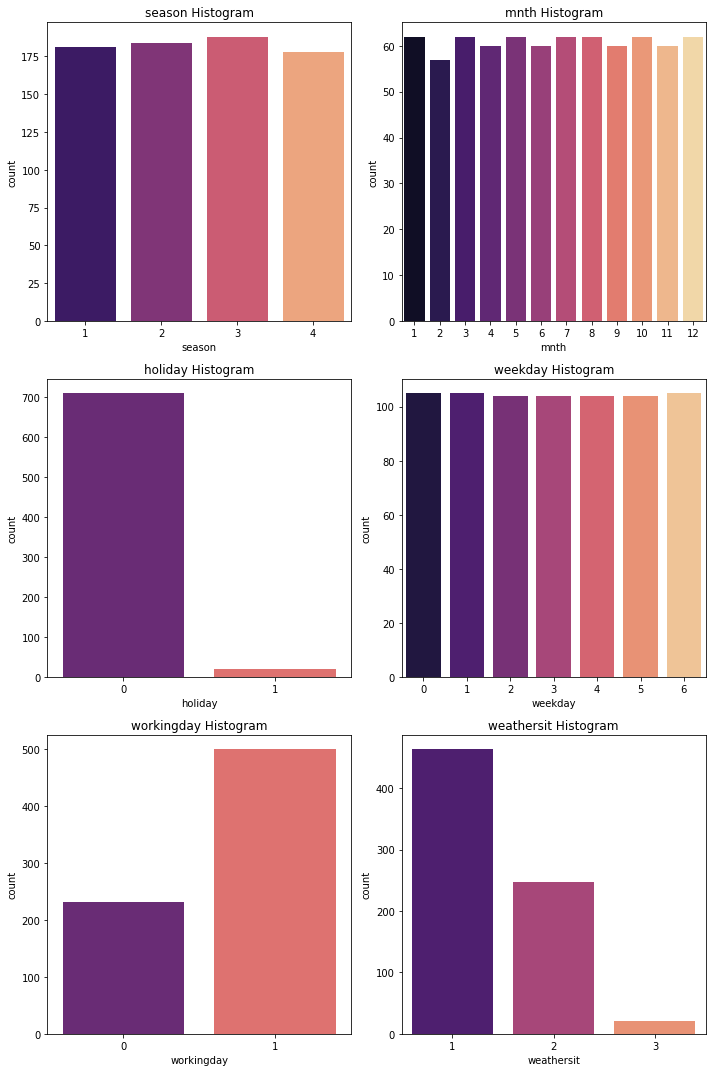

In [7]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data = bike,x=x,palette=("magma"))

plt.figure(figsize=(10,15))

plot_count('season', 1)
plot_count('mnth', 2)
plot_count('holiday', 3)
plot_count('weekday', 4)
plot_count('workingday', 5)
plot_count('weathersit', 6)

plt.tight_layout()

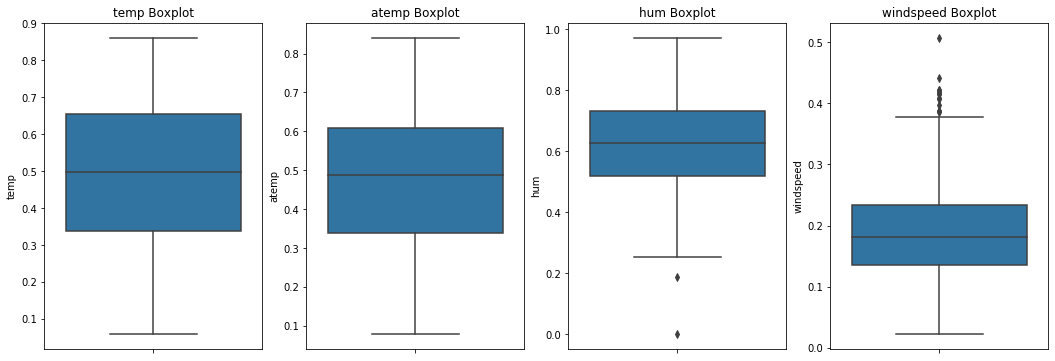

In [8]:
def box_plot(x,fig):
    plt.subplot(1,4,fig)
    plt.title(x+' Boxplot')
    sns.boxplot(y=bike[x])

plt.figure(figsize=(18,6))

box_plot('temp', 1)
box_plot('atemp', 2)
box_plot('hum', 3)
box_plot('windspeed', 4)

### Preporcessing

In [9]:
# Importing liberaries for preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

scale_cols = bike.select_dtypes(include=['float64']).columns.to_list()

preprocessing = ColumnTransformer(
    transformers=[
        ('scaling', RobustScaler(), scale_cols)
    ]
)

### Modelling

In [22]:
# Model processing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from tqdm import tqdm

# Import library for tranformed data's features
from sklearn.compose import TransformedTargetRegressor
import numpy as np

# Models
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

We will drop some feature:
1. instant = this feature is just like id number
2. dteday = this feature usefull for time series analysis, but in this case we are only discussing the regression model so this data is not used
3. casual and registered = these columns just same as cnt column

In [13]:
x = bike.drop(["instant","dteday","casual","registered"], axis=1)
y = bike["cnt"]

# Split data to Train and Test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [25]:
# The models
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    SVR()
]

In [23]:
# # Scale models to logaricmic and transform to original (normalize)
# log_lr = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
# log_knn = TransformedTargetRegressor(KNeighborsRegressor(), func=np.log, inverse_func=np.exp)
# log_dt = TransformedTargetRegressor(DecisionTreeRegressor(), func=np.log, inverse_func=np.exp)
# log_svm = TransformedTargetRegressor(SVR(), func=np.log, inverse_func=np.exp)

# models = [
#     log_lr,
#     log_knn,
#     log_dt,
#     log_svm
# ]

In [29]:
# List for score matrix
rmse_score = []
rmse_mean = []
rmse_std = []

# r2_score = []
# r2_mean = []
# r2_std = []

# Calculate model's matrix score
for model in tqdm(models):
    
    # Cross validate split
    crossval = KFold(n_splits=5, shuffle=True, random_state=24)

    # Create pipeline for presprocessing and model
    estimator = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])

    # Calculate the accuracy from cross validation
    scores = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    # rms scrore
    rmse_mean.append(round(scores.mean(),2))
    rmse_std.append(round(scores.std(),2))
    
#     # r2 score
#     r2_mean.append(scores['test_r2'].mean())
#     r2_std.append(scores['test_r2'].std())
    
# Model Matrix Evaluation
model_matrix = pd.DataFrame({
    'Model': ['LinearReg', 'KNNReg',  'DecisionTreeReg', 'SVR'],
    'RMSE_Mean': rmse_mean,
    'RMSE_Std': rmse_std
#     'r2_Mean': r2_mean,
#     'r2_Std': r2_std
})
model_matrix.sort_values(by='RMSE_Mean', ascending=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.88it/s]


,Model,RMSE_Mean,RMSE_Std
1,KNNReg,-1363.03,72.48
0,LinearReg,-1467.47,97.11
2,DecisionTreeReg,-1779.54,96.98
3,SVR,-1939.82,60.67
